# Final Project Report

* Class: DS 5100
* Student Name: Brendan Jalali
* Student Net ID: bdj9wf
* This URL: https://github.com/brendanjalali/bdj9wf_ds5100_montecarlo/blob/main/FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/brendanjalali/bdj9wf_ds5100_montecarlo

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```python
import pandas as pd
import numpy as np


# Die class 
class Die:
    """
    PURPOSE: Creates a die object with initializer and 3 methods to change the weighting of the die, roll the die, and show the state of the die
    """
    # constructor
    def __init__(self, faces):
        """
        PURPOSE: Constructor for the die object

        INPUTS
        faces    numpy array of face values (int or str)

        ERRORS
        TypeError    Checks if the inputed faces are a numpy array
        ValueError    Checks that the faces are unique
        """
        if not isinstance(faces, np.ndarray):
            raise TypeError("Make sure faces is a Numpy Array.")
        if len(faces) != len(np.unique(faces)):
            raise ValueError("Face values must be distinct.")
        
        self._df = pd.DataFrame({'weights': [1.0]*len(faces)}, index=faces)
    
    #Method 1: Change weight of single side
    def change_weight(self, face_val, weight_val):
        """
        PURPOSE: Changes weight of a specific face of the die object

        INPUTS
        face_val    face whose weight is to be changed (int or str)
        weight_val    value of the weight to be changed (int or str)

        ERRORS
        IndexError    Checks if the face is in the die
        TypeError    makes sure weight is castable as an int
        """
        if face_val not in self._df.index:
            raise IndexError("Face of die doesn't exist")
        if not (isinstance(weight_val, (int, float)) or str(weight_val).isnumeric()):
            raise TypeError("Weight must be new numeric or castable as numeric")
        
        self._df.loc[face_val, 'weights'] = weight_val
    
    #Method 2: Roll the die one or more times
    def roll(self, rolls = 1):
        """
        PURPOSE: "rolls" the die, ie outputs the face that is chosen

        INPUTS
        rolls    default of 1, number of rolls being attempted

        OUTPUT
        list of rolls min size of 1 with all the faces that were chosen with replacement
        """
        return np.random.choice(self._df.index, size=rolls, p=self._df['weights']/np.sum(self._df['weights'])).tolist()
    
    #Method 3: Shows current state of die
    def show_state(self):
        """
        PURPOSE: return the dataframe of the die faces and their respective weights

        OUTPUT
        returns a copy of the private dataframe of the state of the die
        """
        return self._df.copy()
    

# Game Class
class Game:
    """
    PURPOSE: Allows for the rolling of multiple similar dice at once
    """
    # constructor
    def __init__(self, die_list):
        """
        PURPOSE: Contructor for the game class

        INPUTS
        die_list    list of the similar dies that you wanted to roll
        """
        self.die_list = die_list
        self._df = None
      
    #Method 1: method to make a play (roll the dice in dice list)
    def play(self, num_rolls):
        """
        PURPOSE: "rolls" each the die, ie outputs the face that is chosen for each of the die rolled

        INPUTS
        num_rolls    number of rolls for each of the similar dice
        """
        results = {}
        
        for i, die in enumerate(self.die_list):
            results[f'die_{i}'] = die.roll(num_rolls)
        self._df = pd.DataFrame(results)
        
    #Method 2:
    def show_results(self, form='wide'):
        """
        PURPOSE: shows the state of the game with all the dies and their rolled faces 

        INPUTS
        form    defaults to wide, can be set to narrow (the shape of the df)

        OUTPUT
        returns either the form of the data frame, with all dies and their rolled faces
        """
        if form == 'wide':
            if self._df is None:
                return pd.DataFrame()
            return self._df.copy()
        elif form == "narrow":
            if self._df is None:
                return pd.DataFrame()
            else:
                return self._df.melt(ignore_index=False, var_names='die_number', value_name='outcomes')
        else:
            raise ValueError("make sure input is 'wide' or 'narrow'")

# Analyzer Class
class Analyzer:
    """
    PURPOSE: takes the game class object and does multiple analysis
    """
    # constructor
    def __init__(self, game):
        """
        PURPOSE: Contructor for the Analyzer class

        INPUTS
        game    the game object with the all the rolls and faces that were chosen

        ERRORS
        ValueError    Checks that it is a game object that is inputed
        """
        if not isinstance(game, Game):
            raise ValueError("Make sure you input a Game object")
        self.game = game
    
    #Method 1: Jackpot is the result when all the faces are the same
    def jackpot(self):
        """
        PURPOSE: returns the number of time where all the faces rolled in a game were the same 
        """
        return(self.game.show_results().eq(self.game.show_results().iloc[:, 0], axis=0).all(1).sum())

    #Method 2: Computes how many times a given face is rolled in each event.
    def face_counts(self):
        """
        PURPOSE: Computes how many times a given face is rolled in each event 

        OUTPUT
        returns a dataframe of the face counts per roll on from the inputed game
        """
        return(self.game.show_results().apply(pd.Series.value_counts, axis=1))
    
    #Method 3: Computes the distinct combinations of faces rolled, along with their counts
    def combo_counts(self):
        """
        PURPOSE: Computes the distinct combinations of faces rolled, along with their counts

        OUTPUT
        returns a dataframe of the combo counts from the inputed game
        """
        return(pd.DataFrame(self.game.show_results().apply(lambda row: tuple(row), axis=1).value_counts(), columns=['counts']))
    
    #Method 4: Computes the distinct permutations of faces rolled, along with their counts
    def permutation_counts(self):
        """
        PURPOSE: Computes the distinct permutations of faces rolled, along with their counts.

        OUTPUT
        returns a dataframe of the distinct permutations of the faces rolled from the inputed game
        """
        return(pd.DataFrame(self.game.show_results().apply(lambda row: ''.join(map(str, row)), axis=1).value_counts(), columns=['counts']))
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python
from Demo.montecarlo import Die, Game, Analyzer

import unittest
import pandas as pd
import numpy as np

class TestDieMethods(unittest.TestCase):
    def test_init_die(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(test_faces)
        self.assertIsInstance(die.show_state(), pd.DataFrame)

    def test_change_weight(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(test_faces)
        die.change_weight(1, 2.5)
        self.assertEqual(die.show_state().loc[1, 'weights'], 2.5)

    def test_roll(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(test_faces)
        outcomes = die.roll(10)
        self.assertEqual(len(outcomes), 10)

    def test_show_state(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(test_faces)
        state = die.show_state()
        self.assertIsInstance(state, pd.DataFrame)

class TestGameMethods(unittest.TestCase):
    def test_init_game(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(test_faces)
        die2 = Die(test_faces)
        game = Game([die1, die2])
        self.assertIsInstance(game.die_list, list)

    def test_play(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(test_faces)
        die2 = Die(test_faces)
        game = Game([die1, die2])
        game.play(5)
        self.assertIsNotNone(game.show_results())

    def test_show_results(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(test_faces)
        die2 = Die(test_faces)
        game = Game([die1, die2])
        game.play(5)
        results = game.show_results()
        self.assertIsInstance(results, pd.DataFrame)
        
class TestAnalyzerMethods(unittest.TestCase):
    def test_analyzer(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(test_faces)
        die2 = Die(test_faces)
        game = Game([die1, die2])
        game.play(5)
        analyzer = Analyzer(game)

    def test_combo_counts(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(test_faces)
        die2 = Die(test_faces)
        game = Game([die1, die2])
        game.play(5)
        analyzer = Analyzer(game)
        combos = analyzer.combo_counts()
        self.assertIsInstance(combos, pd.DataFrame)

    def test_face_counts(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(test_faces)
        die2 = Die(test_faces)
        game = Game([die1, die2])
        game.play(5)
        analyzer = Analyzer(game)
        counts = analyzer.face_counts()
        self.assertIsInstance(counts, pd.DataFrame)

    def test_permutation_counts(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(test_faces)
        die2 = Die(test_faces)
        game = Game([die1, die2])
        game.play(5)
        analyzer = Analyzer(game)
        perms = analyzer.permutation_counts()
        self.assertIsInstance(perms, pd.DataFrame)
    
if __name__ == '__main__':
    unittest.main(verbosity=2)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```bash
[bdj9wf bdj9wf_ds5100_montecarlo]$ python montecarlo_test.py
Welcome to Brendan Jalali's Final Poject Module
test_combo_counts (__main__.TestAnalyzerMethods) ... ok
test_face_counts (__main__.TestAnalyzerMethods) ... ok
test_init_analyzer (__main__.TestAnalyzerMethods) ... ok
test_jackpot (__main__.TestAnalyzerMethods) ... ok
test_permutation_counts (__main__.TestAnalyzerMethods) ... ok
test_change_weight (__main__.TestDieMethods) ... ok
test_init_die (__main__.TestDieMethods) ... ok
test_roll (__main__.TestDieMethods) ... ok
test_show_state (__main__.TestDieMethods) ... ok
test_init_game (__main__.TestGameMethods) ... ok
test_play (__main__.TestGameMethods) ... ok
test_show_results (__main__.TestGameMethods) ... ok
----------------------------------------------------------------------
Ran 12 tests in 0.043s
OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [7]:
import Demo.montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [8]:
help(Demo.montecarlo)

Help on module Demo.montecarlo in Demo:

NAME
    Demo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  PURPOSE: takes the game class object and does multiple analysis
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      PURPOSE: Contructor for the Analyzer class
     |      
     |      INPUTS
     |      game    the game object with the all the rolls and faces that were chosen
     |      
     |      ERRORS
     |      ValueError    Checks that it is a game object that is inputed
     |  
     |  combo_counts(self)
     |      PURPOSE: Computes the distinct combinations of faces rolled, along with their counts
     |      
     |      OUTPUT
     |      returns a dataframe of the combo counts from the inputed game
     |  
     |  face_counts(self)
     |      PURPOSE: Computes how many times a given face is rolled in each event 
     

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/brendanjalali/bdj9wf_ds5100_montecarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

```bash
[bdj9wf bdj9wf_ds5100_montecarlo]$ pip install -e .
Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/qumulo/qhome/bdj9wf/Documents/MSDS/DS5100/bdj9wf_ds5100_montecarlo
Requirement already satisfied: pandas in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from Demo==0.1) (1.1.3)
Requirement already satisfied: numpy in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from Demo==0.1) (1.19.2)
Requirement already satisfied: matplotlib in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from Demo==0.1) (3.3.2)
Requirement already satisfied: pytz>=2017.2 in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from pandas->Demo==0.1) (2020.1)
Requirement already satisfied: python-dateutil>=2.7.3 in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from pandas->Demo==0.1) (2.8.1)
Requirement already satisfied: kiwisolver>=1.0.1 in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from matplotlib->Demo==0.1) (1.3.0)
Requirement already satisfied: certifi>=2020.06.20 in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from matplotlib->Demo==0.1) (2023.11.17)
Requirement already satisfied: cycler>=0.10 in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from matplotlib->Demo==0.1) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.3 in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from matplotlib->Demo==0.1) (2.4.7)
Requirement already satisfied: pillow>=6.2.0 in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from matplotlib->Demo==0.1) (8.0.1)
Requirement already satisfied: six>=1.5 in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from python-dateutil>=2.7.3->pandas->Demo==0.1) (1.15.0)
Installing collected packages: Demo
  Attempting uninstall: Demo
    Found existing installation: Demo 0.1
    Uninstalling Demo-0.1:
      Successfully uninstalled Demo-0.1
  Running setup.py develop for Demo
Successfully installed Demo
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

In [9]:
from Demo.montecarlo import Die, Game, Analyzer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(5100)

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [10]:
fcoin = Die(np.array(['H', 'T']))
ucoin = Die(np.array(['H', 'T']))
ucoin.change_weight('H', 5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [11]:
gameff = Game([fcoin, fcoin])
gameff.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [12]:
gameuuf = Game([ucoin, ucoin, fcoin])
gameuuf.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [13]:
numjackff = Analyzer(gameff).jackpot()
print(numjackff)
numjackuuf = Analyzer(gameuuf).jackpot()
print(numjackuuf)

507
356


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [14]:
reljackff = numjackff/1000
reljackuuf = numjackuuf/1000

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

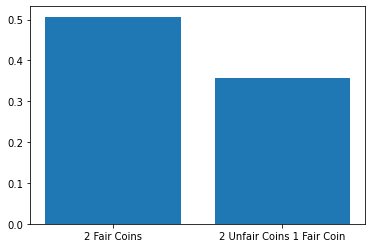

In [15]:
plot1 = plt.bar(x = ['2 Fair Coins','2 Unfair Coins 1 Fair Coin'], height = [reljackff,reljackuuf])
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [16]:
d = Die(np.array([1, 2, 3, 4, 5, 6]))

ud1 = Die(np.array([1, 2, 3, 4, 5, 6]))
ud2 = Die(np.array([1, 2, 3, 4, 5, 6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [17]:
ud1.change_weight(6, 5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [18]:
ud2.change_weight(1, 5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [19]:
gamefffff = Game([d, d, d, d, d])
gamefffff.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [20]:
gameuufff = Game([ud1, ud2, d, d, d])
gameuufff.play(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

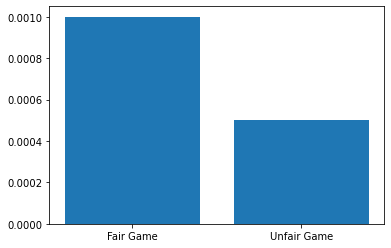

In [21]:
numjackfffff = Analyzer(gamefffff).jackpot()
numjackuufff = Analyzer(gameuufff).jackpot()

reljackfffff = numjackfffff / 10000
reljackuufff = numjackuufff / 10000

plt.bar(x=['Fair Game', 'Unfair Game'], height=[reljackfffff, reljackuufff])
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [22]:
letterdf = pd.read_csv("data/english_letters.txt", sep=' ', header=None, names=['Letters', 'Frequencies'])

ld = Die(np.array(list(letterdf["Letters"])))
freqs = np.array(list(letterdf["Frequencies"]))

for index, row in letterdf.iterrows():
    ld.change_weight(row['Letters'], row['Frequencies'])

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [23]:
game4l = Game([ld, ld, ld, ld])
game4l.play(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [24]:
with open("data/scrabble_words.txt", 'r') as file:
    scrabblewords = set(file.read().split())

numperms4l = Analyzer(game4l).permutation_counts()

wordmatch4l = sum(word in scrabblewords for word in numperms4l.index)

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

4.242424242424243
0.5


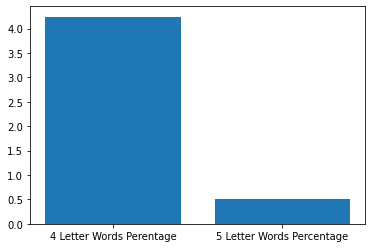

In [25]:
game5l = Game([ld, ld, ld, ld, ld])
game5l.play(1000)

numperms5l = Analyzer(game5l).permutation_counts()

wordmatch5l = sum(word in scrabblewords for word in numperms5l.index)

perc4 = (wordmatch4l / len(numperms4l)) * 100
perc5 = (wordmatch5l / len(numperms5l)) * 100

print(perc4)
print(perc5)

plt.bar(x=['4 Letter Words Perentage', '5 Letter Words Percentage'], height=[perc4, perc5])
plt.show()

# percentage of 4 letter words was more

# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.